In [1]:
from regim import *
import tensorwatch as tw
import numpy as np

In [2]:
ds = DataUtils.mnist_datasets(linearize=True, train_test=False)
ds = DataUtils.sample_by_class(ds, k=100, shuffle=True, as_np=True, no_test=True)

In [3]:
len(ds)

2

In [4]:
ds[0][1].shape[0]

784

In [5]:
#show_image(ds[0][1])

In [6]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [7]:
imgs = StandardScaler().fit_transform(ds[0])
imgs.shape

(1000, 784)

In [8]:
tsne = TSNE(n_components=3, perplexity=20)
tsne_results = tsne.fit_transform(imgs) 

In [9]:
tsne_results.shape

(1000, 3)

In [10]:
import matplotlib.pyplot as plt
import math
def show_image(img):
    if hasattr(img, 'shape'):
        if len(img.shape) == 1:
            h = int(math.sqrt(img.shape[0]))
            img = np.reshape(img, (h, int(img.shape[0] / h)))
    plt.imshow(img)

    'data': [{'hoverinfo': 'text',
              'marker': {'color': array([3, 8…

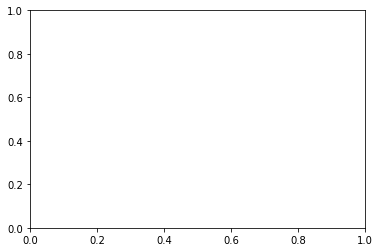

In [11]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.callbacks import Points, InputDeviceState

traceTSNE = go.Scatter3d(
    x = tsne_results[:,0],
    y = tsne_results[:,1],
    z = tsne_results[:,2],
    text = [str(l) for l in ds[1]],
#     hoveron = Target,
    mode = 'markers+text',
#     text = Target.unique(),
    showlegend = False,
    hoverinfo = 'text',
    marker = dict(
        size = 6,
        color = ds[1],
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceTSNE]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
                hovermode= 'closest',
                yaxis = dict(zeroline = False),
                xaxis = dict(zeroline = False),
                showlegend= True,
                margin=dict(
                        l=0,
                        r=0,
                        b=0,
                        t=0
                    )
             )

from ipywidgets import HBox, VBox, Image, Layout, Output
from IPython.display import display, clear_output
image_widget = Output()
figure = plt.figure()
ax_main = figure.add_subplot(111)
figwig = go.FigureWidget(data=data, layout=layout)


def hover_fn(trace, points, state):
    global image_widget
    ind = points.point_inds[0]
    with image_widget:
        clear_output(wait=True)    
        ax_main.imshow(np.reshape(ds[0][ind],(28,28)))
        display(figure)
figwig.data[0].on_hover(hover_fn)



HBox([figwig, image_widget], layout=Layout(height='8in'))

In [12]:
help(figwig.data[0].on_hover)

Help on method on_hover in module plotly.basedatatypes:

on_hover(callback, append=False) method of plotly.graph_objs._scatter3d.Scatter3d instance
    Register function to be called when the user hovers over one or more
    points in this trace
    
    Note: Callbacks will only be triggered when the trace belongs to a
    instance of plotly.graph_objs.FigureWidget and it is displayed in an
    ipywidget context. Callbacks will not be triggered on figures
    that are displayed using plot/iplot.
    
    Parameters
    ----------
    callback
        Callable function that accepts 3 arguments
    
        - this trace
        - plotly.callbacks.Points object
        - plotly.callbacks.InputDeviceState object
    
    append : bool
        If False (the default), this callback replaces any previously
        defined on_hover callbacks for this trace. If True,
        this callback is appended to the list of any previously defined
        callbacks.
    
    Returns
    -------
    None